### Data Analysis
## US Tornado Dataset 1950-2021.

An US Tornado Dataset is a collection of data that includes information on the record of tornado from 1950-2021.

*Original dataset can be downloaded from the **[Kaggle.com](https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021)** website*

### Questions
1. How many times tornado shook US in every years?
2. How many injuries and fatalities in every years due to a tornado?
3. What year had the most victims?
4. Which State had the most tornado event?
4. How many tornadoes occur in state each year?



## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [4]:
DATA_PATH = "D:/Courses Asset/Dataset/US Tornado Dataset 1950-2021/us_tornado_data.csv"

raw_data = pd.read_csv(DATA_PATH)
raw_data.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    67558 non-null  object 
 1   st      67558 non-null  object 
 2   mag     67558 non-null  int64  
 3   inj     67558 non-null  int64  
 4   fat     67558 non-null  int64  
 5   slat    67558 non-null  float64
 6   slon    67558 non-null  float64
 7   elat    67558 non-null  float64
 8   elon    67558 non-null  float64
 9   len     67558 non-null  float64
 10  wid     67558 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 5.7+ MB


In [11]:
df.isnull().sum()

date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64

## Data Cleaning & Processing

In [8]:
#backup data
df = raw_data

In [9]:
#remove 'yr','mo','dy' columns
col_to_remove = ['yr','dy','mo']

for col in col_to_remove:
    del df[col]
df.head()

,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [13]:
#change datatype of 'date' column to date
df['date'] = pd.to_datetime(df['date'])

In [169]:
df.head()

,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,year
0,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,1950
1,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,1950
2,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,1950
3,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,1950
4,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,1950


## Data Visualization

### Q1: How many times tornado shook US in every years?

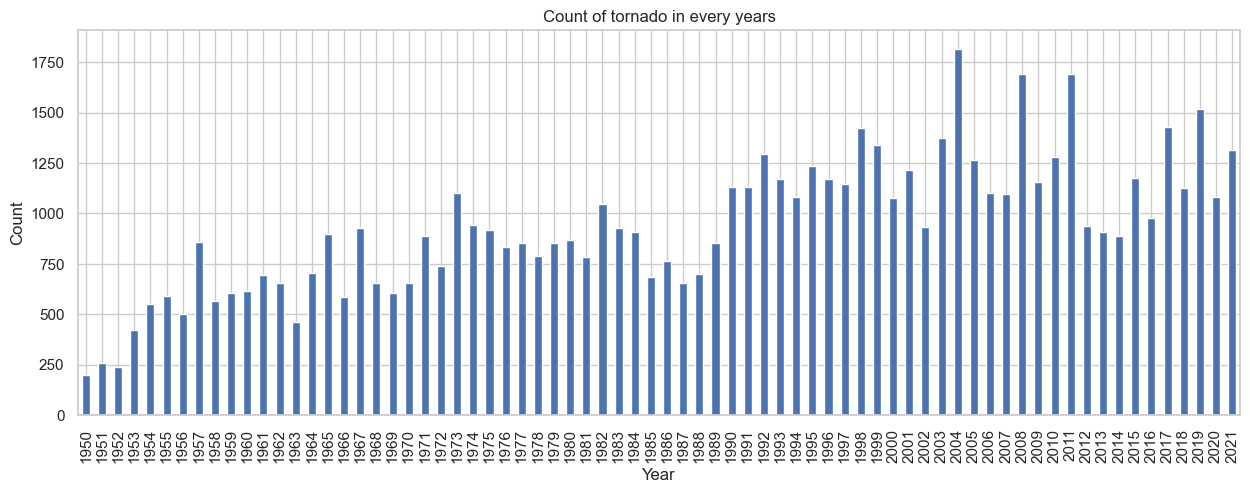

In [188]:
df['year'] = df['date'].dt.year
yearly_count = df['year'].value_counts().sort_index()

#create visual
plt.figure(figsize=(15, 5)) 
yearly_count.plot(kind='bar',xlabel='Year',ylabel='Count',title='Count of tornado in every years')
plt.show()

### Q2: How many injuries and fatalities in every years due to a tornado?

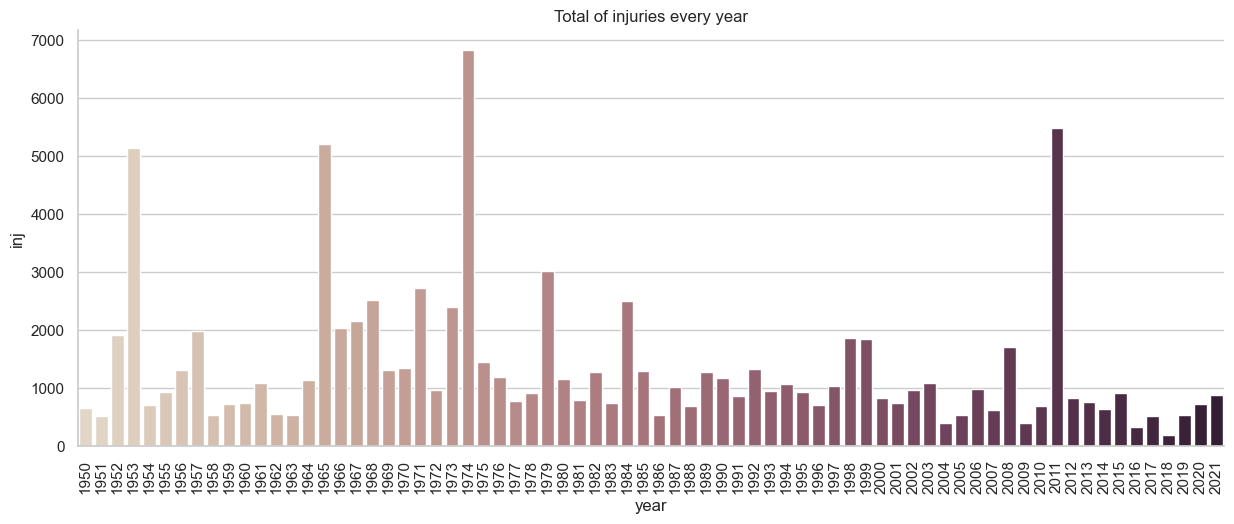

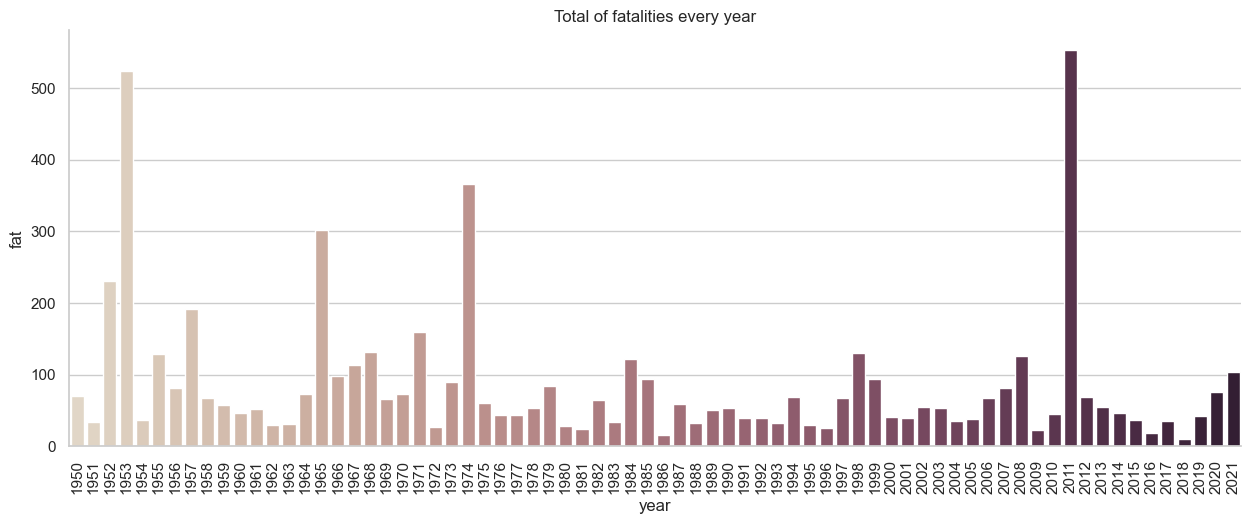

In [123]:
fat_by_years = df.groupby('year')['fat'].sum().reset_index()
inj_by_years = df.groupby('year')['inj'].sum().reset_index()

sns.set(style="whitegrid", color_codes=True)

inj_plot = sns.catplot(data=inj_by_years, x='year', y='inj',kind='bar',palette="ch:.25") 
plt.title('Total of injuries every year')
fat_plot = sns.catplot(data=fat_by_years, x='year', y='fat',kind='bar',palette="ch:.25") 
plt.title('Total of fatalities every year')

inj_plot.fig.set_figwidth(15)
inj_plot.set_xticklabels(rotation=90)
fat_plot.fig.set_figwidth(15)
fat_plot.set_xticklabels(rotation=90)

### Q3: What year had the most victims?

In [126]:
inj_sum = df.groupby('year')['inj'].sum()
fat_sum = df.groupby('year')['fat'].sum()
max_inj_year = inj_sum.idxmax()
max_fat_year = fat_sum.idxmax()
print(f"Year with the highest injuries: {max_inj_year}")
print(f"Year with the highest fatalities: {max_fat_year}")

Year with the highest injuries: 1974
Year with the highest fatalities: 2011


### Q4: Which State had the most tornado event?

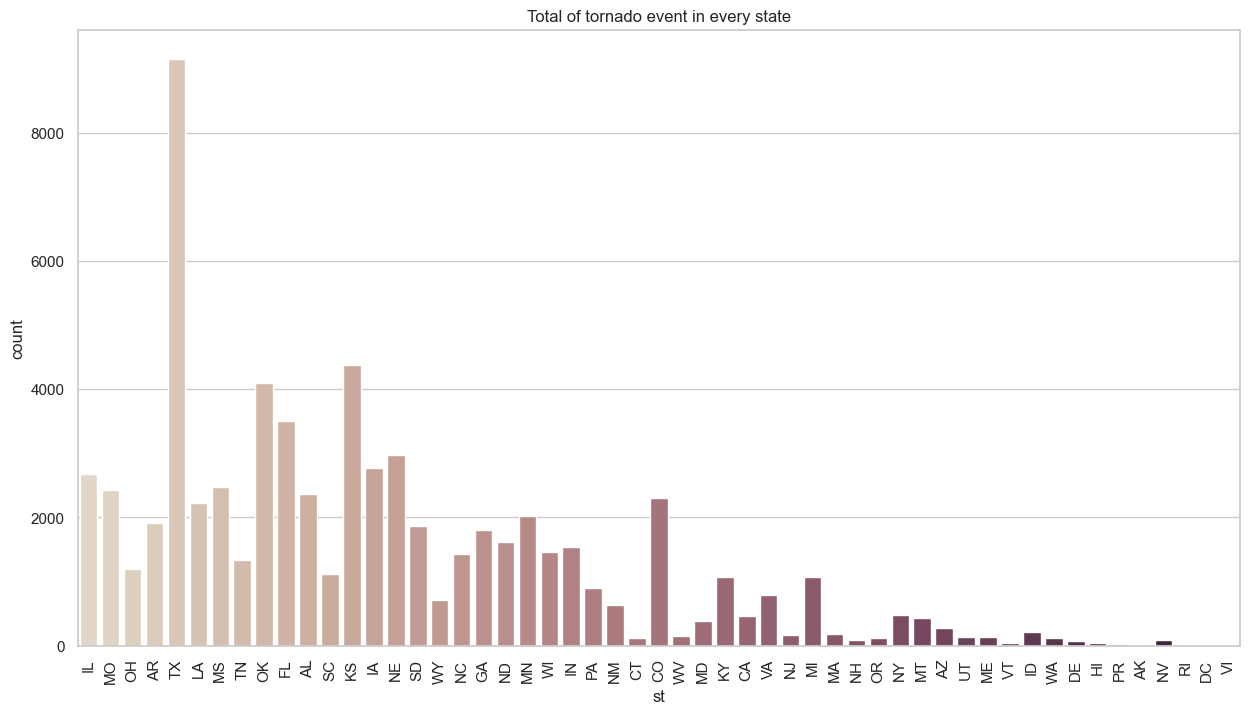

In [184]:
plt.figure(figsize=(15,8))
st_plot = sns.countplot(x='st',data=df,palette="ch:.25")
plt.title('Total of tornado event in every state')
st_plot.tick_params(axis='x', labelrotation=90)

In [150]:
st_sum = df['st'].value_counts()
print(f"State with the the most tornado event: {st_sum.idxmax()}")

State with the the most tornado event: TX


### Q5: How many tornadoes occur in state each year?

In [181]:
#group by state and year
st_sum_by_year = df.groupby('year')['st'].value_counts()
value_counts_df = st_sum_by_year.reset_index(name='Count')

#create pivot table
pivot_table = value_counts_df.pivot_table(values='Count', index='st', columns='year', aggfunc='sum')
pivot_table_filled = pivot_table.fillna(0)
pivot_table_filled

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
st,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,2.0,5.0,11.0,22.0,9.0,6.0,5.0,45.0,21.0,8.0,...,55.0,21.0,52.0,31.0,63.0,57.0,44.0,80.0,70.0,65.0
AR,12.0,2.0,26.0,9.0,26.0,22.0,13.0,27.0,7.0,9.0,...,18.0,31.0,20.0,20.0,23.0,37.0,34.0,29.0,42.0,32.0
AZ,0.0,0.0,1.0,0.0,2.0,1.0,3.0,5.0,4.0,2.0,...,1.0,1.0,3.0,5.0,1.0,3.0,5.0,12.0,2.0,6.0
CA,0.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,10.0,1.0,...,12.0,4.0,9.0,10.0,4.0,3.0,6.0,14.0,8.0,4.0
CO,2.0,8.0,3.0,14.0,9.0,18.0,10.0,24.0,18.0,1.0,...,33.0,26.0,49.0,54.0,39.0,19.0,45.0,49.0,35.0,48.0
CT,2.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,...,0.0,4.0,1.0,0.0,1.0,0.0,9.0,1.0,7.0,8.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
DE,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,4.0,2.0
